In [1]:
import tools
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

### Parameters found in Homework 2

In [2]:
mus = np.array([[ 3.80070933, -3.79729494],
       [-3.06196045, -3.53454022],
       [-2.03436691,  4.172586  ],
       [ 3.97793064,  3.77333816]])

In [3]:
sigmas = [np.array([[ 0.92127818,  0.05738057],
        [ 0.05738057,  1.86586533]]), np.array([[ 6.24141047,  6.05017593],
        [ 6.05017593,  6.18245649]]), np.array([[ 2.90442399,  0.2065578 ],
        [ 0.2065578 ,  2.75617084]]), np.array([[  0.21035643,   0.29044911],
        [  0.29044911,  12.23993185]])]

### Smoothing

In [4]:
K = 4
train = np.loadtxt('EMGaussian.data')
test = np.loadtxt('EMGaussian.test')
A = (1 / 6) * np.ones((K, K)) + (1 / 3) * np.identity(K)
Pi = 0.25 * np.ones(4)

log_alpha = tools.log_alpha(test, Pi, mus, sigmas, A)
log_beta = tools.log_beta(test, Pi, mus, sigmas, A)

In [5]:
p = tools.smoothing(log_alpha, log_beta)

In [6]:
p.shape

(500, 4)

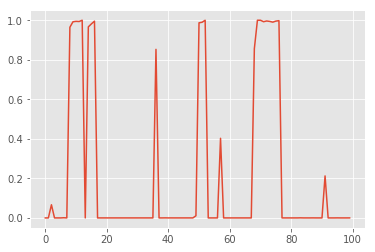

In [7]:
plt.plot(p[:100,0])
plt.show()

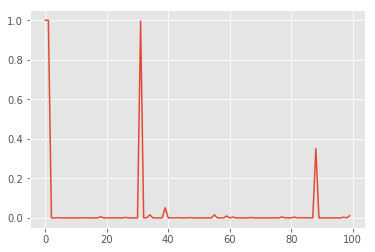

In [8]:
plt.plot(p[:100,1])
plt.show()

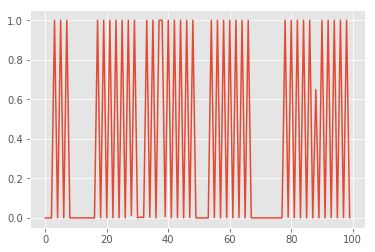

In [9]:
plt.plot(p[:100,2])
plt.show()

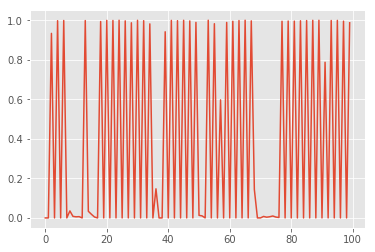

In [10]:
plt.plot(p[:100,3])
plt.show()

### EM Algorithm

In [11]:
Pi, A, mus, Sigmas, log_likelihood_train, log_likelihood_test = tools.EM(train, test, A, Pi, mus, sigmas)

C:\Users\youce\OneDrive\MVA\PGM\HWK_3\Graphical_Model_HMK3\tools.py:25: RuntimeWarning: divide by zero encountered in log
  log_alpha[t, k] = np.log(Gaussian(U[t, :], mus[k], Sigmas[k])) + a_ + np.log(np.sum(np.exp(a - a_)))
C:\Users\youce\OneDrive\MVA\PGM\HWK_3\Graphical_Model_HMK3\tools.py:41: RuntimeWarning: divide by zero encountered in log
  a[i] = np.log(Gaussian(U[t, :], mus[i], Sigmas[i])) + log_beta[t + 1, i] + np.log(A[i, k])
C:\Users\youce\OneDrive\MVA\PGM\HWK_3\Graphical_Model_HMK3\tools.py:92: RuntimeWarning: divide by zero encountered in log
  table[i] = np.log(Gaussian(U[i], mus[j], Sigmas[j]))
C:\Users\youce\OneDrive\MVA\PGM\HWK_3\Graphical_Model_HMK3\tools.py:19: RuntimeWarning: divide by zero encountered in log
  log_alpha[0, k] = np.log(pi[k]) + np.log(Gaussian(U[0, :], mus[k], Sigmas[k]))
C:\Users\youce\OneDrive\MVA\PGM\HWK_3\Graphical_Model_HMK3\tools.py:23: RuntimeWarning: divide by zero encountered in log
  a = log_alpha[t - 1, :] + np.log(A[k, :])
C:\Users\youce

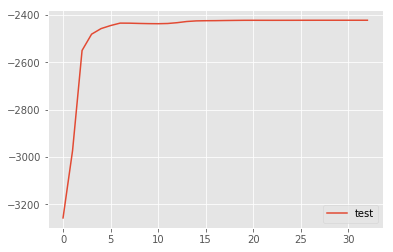

In [39]:
plt.plot(log_likelihood_test, label = "test")
plt.legend()
plt.show()

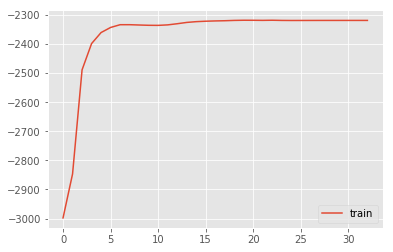

In [40]:
plt.plot(log_likelihood_train, label = "train")
plt.legend()
plt.show()

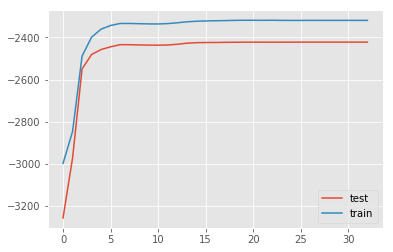

In [38]:
plt.plot(log_likelihood_test, label = "test")
plt.plot(log_likelihood_train, label = "train")
plt.legend()
plt.show()